# 4.10 O caixeiro que prefere cidades ímpares
<div style="text-align: justify">

## Objetivo:
Encontre o caminho de menor distância no problema do caixeiro viajante
que prefere cidades ímpares e mostre ele de forma gráfica.

## Considerações do experimento:
&nbsp;&nbsp;&nbsp;&nbsp;Considere um número n ≥ 7 de coordenadas
(x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as
coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O
caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina
seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade
mais de uma vez. Além disso, atribua um número inteiro para cada uma das n cidades que
o caixeiro irá visitar, iniciando a contagem pelo número zero e aumentando esse número
de 1 em 1. O caixeiro deverá necessariamente visitar primeiro as cidades com números
ímpares antes das cidades com números pares. A cidade de número zero deve ser a cidade
inicial.

## Resolução
Modificações feitas em [1]
<div style="text-align: justify">

Para resolver esse problema precisamos encontrar uma forma de obrigar o percurso do caixeiro a começar sempre pelas cidades ímpares e depois seguir para as pares. Há muitas formas de se fazer esse processo,  mas nesse caso, isso será feito por meio da função `sequencia_correta()` adicionada ao arquivo de script `funcoes_5_1.py` para melhor organização das atividades.

#### Função de seleção

```python
def sequencia_correta(candidato):
    impar = []
    par = []
    for cidade in candidato:
        indice = int(cidade.split()[1])  # extrai o número da cidade
        if indice % 2 != 0:
            impar.append(cidade)
        else:
            par.append(cidade)
    return impar, par  # junta ímpares primeiro, depois pares


Essa função retorna uma tupla contendo a soma de duas outras listas que foram organizadas em cidades ímpares e pares. Assim, as cidades ímpares sempre seriam as primeiras em relação às pares.

#### Função de criação de candidato
<div style="text-align: justify">

```python
def cria_candidato_caixeiro(cidades):
    nomes_cidades = list(cidades.keys())
    nomes_cidades_impar = [nomes_cidades[i] for i in range(1, len(nomes_cidades), 2)]
    nomes_cidades_par = [nomes_cidades[i] for i in range(0, len(nomes_cidades), 2)]

    caminho_impar = random.sample(nomes_cidades_impar, k=len(nomes_cidades_impar))
    caminho_par = random.sample(nomes_cidades_par, k=len(nomes_cidades_par))

    caminho = caminho_impar + caminho_par
    return caminho
```

Nessa função tínhamos como objetivo obrigar que os candidatos criados fossem válidos. Para isso, criados as variáveis `nomes_cidades_impar` e `nomes_cidades_par` para armazenar as cidades de acordo com a condição. Para isso filtramos a lista de nomes de cidades iterando de duas a duas, guardando as ímpares e as pares em caminhos formados aleatoriamente e depois guardando a soma desses caminhos como um caminho total, na variável `caminho`.


#### Função de Cruzamento
<div style="text-align: justify">

```python

def cruzamento_ponto_simples(pai, mae, chance_de_cruzamento):
    """Realiza cruzamento de ponto simples

    Args:
    pai: lista representando um individuo
    mae: lista representando um individuo
    chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento
    """
    if random.random() < chance_de_cruzamento:
        filho1 = sequencia_correta(mae)[0] + sequencia_correta(pai)[1]
        filho2 = sequencia_correta(pai)[0] + sequencia_correta(mae)[1]
        return filho1, filho2
    else: 
        return pai, mae
```
Nessa função de cruzamento, modificamos a lógica para cruzar apenas as cidades ímpares da mãe com as pares do pai e cruzar as cidades ímpares do pai com as pares da mãe, gerando filhos com variabilidade sem necessariamente modificar a ordem de que os ímpares precisam vir antes dos pares.

#### Função de Mutação
 
```python
def mutacao_troca(populacao, chance_de_mutacao):
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            individuo_impar, individuo_par = sequencia_correta(individuo)
            random.shuffle(individuo_par)
            random.shuffle(individuo_impar)
            individuo = individuo_impar + individuo_par
```
A função de mutação utiliza da separação do individuo em ímpar e par, aplicando a função `sequencia_correta`. Após a separação, aplica-se o método shuffle para embaralhar as partes.


```python
def corrigir_candidato(candidato):
    candidato_novo = candidato.remove["Cidade 00"]
    candidato = ['Cidade 00'] + candidato_novo  

```

### Implementação

In [1]:
from pprint import pprint
from functools import partial
from itertools import permutations

from funcoes_caixeiro_impar import cria_cidades
from funcoes_caixeiro_impar import populacao_caixeiro as cria_populacao
from funcoes_caixeiro_impar import funcao_objetivo_pop_caixeiro
from funcoes_caixeiro_impar import funcao_objetivo_caixeiro
from funcoes_caixeiro_impar import selecao_torneio_min as funcao_selecao
from funcoes_caixeiro_impar import cruzamento_ponto_simples as funcao_cruzamento
from funcoes_caixeiro_impar import mutacao_troca as funcao_mutacao
from funcoes_caixeiro_impar import plota_trajeto

In [2]:
TAMANHO_POPULACAO = 100
NUM_GERACOES = 500
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

In [3]:
NUM_CIDADES = 10
CIDADES = cria_cidades(NUM_CIDADES)
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)

In [4]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)

In [5]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
['Cidade 00', 'Cidade 03', 'Cidade 07', 'Cidade 01', 'Cidade 05', 'Cidade 09', 'Cidade 02', 'Cidade 04', 'Cidade 06', 'Cidade 08'] com distância: 1230.661070280455



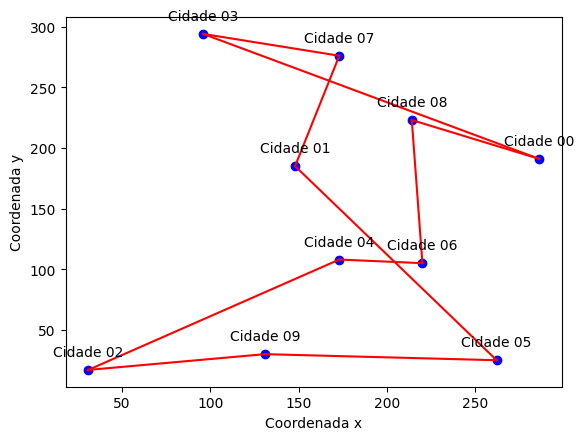

In [6]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)

In [7]:
if NUM_CIDADES < 8:
    fitness_otimo = float("inf")

    # testando todas as permutações possíveis
    for caminho in permutations(list(CIDADES.keys())):
        distancia = funcao_objetivo_caixeiro(caminho, CIDADES)
        if distancia < fitness_otimo:
            fitness_otimo = distancia
            resposta_otima = caminho
            melhor_distancia = distancia

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", melhor_distancia)
    print()

    plota_trajeto(CIDADES, resposta_otima)

### Conclusão
<div style="text-align: justify">

&nbsp;&nbsp;&nbsp;&nbsp; O presente projeto apresentou uma modificação ao problema clássico do caixeiro viajante adicionando uma exigência: a preferencia por cidades ímpares, possibilitando diversas modificações na abordagem clássica. Nele foi possível explorar diferentes formas de se lidar com problemas de indivíduos inválidos.



### Referências

[1].CASSAR, Daniel. [Material de sala de aula]. Redes Neurais e Algoritmos Genéticos, 2025, Ilum - Escola de Ciência.